Install Lib

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install investpy

  Using cached investpy-1.0.8-py3-none-any.whl
  Using cached lxml-4.8.0-cp37-cp37m-win_amd64.whl (3.6 MB)
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached setuptools-62.1.0-py3-none-any.whl (1.1 MB)
  Using cached pandas-1.1.5-cp37-cp37m-win_amd64.whl (8.7 MB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
      Successfully uninstalled numpy-1.15.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.5
    Uninstalling lxml-4.2.5:
      Successfully uninstalled lxml-4.2.5
  Attempting uninstall: requests
    Found existing installation: requests 2.19.1
    Uninstalling requests-2.19.1:
      Successfully uninstalled requests-2.19.1
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.


In [3]:
import sys
!{sys.executable} -m pip install  plotly

  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [14]:
import sys
!{sys.executable} -m pip install  ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28995 sha256=beca13ebb0f6b613cf134a4bc3b17e9e1ee9e51bbd86eb8083b76b8e0d0eb8d1
  Stored in directory: c:\users\hari.moura\appdata\local\pip\cache\wheels\bc\2a\c2\a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import investpy as ip
# import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import plotly.express as px

import seaborn as sns
from scipy.signal import argrelextrema
from ta import add_all_ta_features


## Define intervals and countries

In [4]:
countries = ['brazil', 'united states']#n countries
intervals = ['Daily','Weekly','Monthly']

## Function to get historical data from investpy

In [2]:
def search_stocks(stock, country, from_date, to_date, interval):
    print("stock =>",stock)
    return ip.get_stock_historical_data(stock=stock,
                                  country=country,
                                  from_date=from_date,
                                  to_date=to_date,
                                  interval=interval)

## Get AAPL records and test

In [49]:
aapl = search_stocks("AAPL", countries[1], '13/04/2020', '22/04/2022', intervals[0])

stock => AAPL


### Test .head .desxcribe and .tail

Head

In [12]:
aapl.head()

,Open,High,Low,Close,Volume,Currency,Diff
Date,,,,,,,
2020-04-13,67.08,68.43,66.46,68.31,131023000,USD,-1.23
2020-04-14,70.00,72.06,69.51,71.76,194995008,USD,-1.76
2020-04-15,70.60,71.58,70.16,71.11,131155000,USD,-0.51
2020-04-16,71.85,72.05,70.59,71.67,157124992,USD,0.18
2020-04-17,71.17,71.74,69.21,70.70,215250000,USD,0.47


Tail

In [ ]:
aapl.tail()

Describe

In [ ]:
aapl.describe()

In [ ]:
print(aapl.columns)
print(aapl.index)

In [ ]:
#Last 10
aapl["Close"][-10:]

In [ ]:
## loc usage
# print(aapl.loc[ pd.Timestamp("2020-11-01") : pd.Timestamp("2020-12-31") ].head())
## First rows fromgiven date
# print(aapl.loc["2020"].head())
## iloc usage
# print(aapl.iloc[22:43])# from index x(22) to index y(43)

In [ ]:
aapl.sample(20)

In [21]:
aapl.resample('M').mean()

,Open,High,Low,Close,Volume,Diff,sma20,sma30,ema20,ema30,i,diff_local_max
Date,,,,,,,,,,,,
2020-04-30,0.613846,0.649231,0.586154,0.616923,1.874099e+08,-3.076923e-03,NaN,NaN,0.557394,0.533342,6.0,0.076923
2020-05-31,0.656500,0.686000,0.634000,0.659000,1.587166e+08,-2.500000e-03,0.643357,0.643083,0.627423,0.586643,22.5,0.000000
2020-06-30,0.994762,1.041905,0.955238,1.010476,2.506836e+08,-1.571429e-02,0.811690,0.756429,0.839449,0.725075,43.0,0.000000
2020-07-31,1.411739,1.452609,1.343478,1.400870,3.138264e+08,1.086957e-02,1.199674,1.116797,1.202198,1.009795,65.0,0.043478
2020-08-31,1.620952,1.676667,1.572381,1.623333,2.197305e+08,-2.380952e-03,1.597000,1.501952,1.572179,1.353240,87.0,0.000000
2020-09-30,1.784286,1.823333,1.725238,1.773333,2.066813e+08,1.095238e-02,1.725929,1.700952,1.723642,1.568293,108.0,0.000000
2020-10-31,1.663810,1.687143,1.621429,1.656667,9.910541e+07,7.142857e-03,1.711476,1.729429,1.699093,1.646812,129.0,0.000000
2020-11-30,1.802000,1.851500,1.768000,1.817000,1.299800e+08,-1.500000e-02,1.688400,1.685800,1.714243,1.676181,149.5,0.000000
2020-12-31,2.238500,2.300000,2.174000,2.238500,1.748870e+08,-2.220446e-17,2.084175,1.965817,2.090784,1.916530,169.5,0.050000


In [ ]:
aapl.asfreq('M', method="bfill")

In [5]:
aapl = search_stocks("OIBR3", countries[0], '13/04/2020', '22/04/2022', intervals[0])
aapl['Diff'] = aapl.Open - aapl.Close
aapl['Diff']

stock => OIBR3


Date
2020-04-13   -0.01
2020-04-14   -0.04
2020-04-15   -0.08
2020-04-16    0.01
2020-04-17    0.00
              ... 
2022-04-14   -0.04
2022-04-18   -0.01
2022-04-19   -0.06
2022-04-20    0.02
2022-04-22    0.04
Name: Diff, Length: 503, dtype: float64

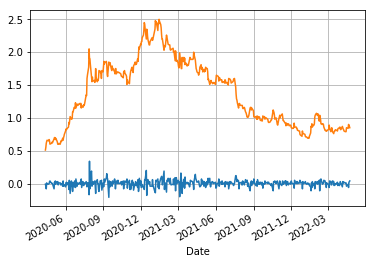

In [11]:
aapl["Diff"].plot(grid=True)
aapl["Close"].plot(grid=True)


Add simple and exponetial moving average

In [12]:

aapl["sma20"] = aapl["Close"].rolling(window=20).mean()
aapl["sma30"] = aapl["Close"].rolling(window=30).mean()

aapl["ema20"]= aapl["Close"].ewm(span=20, adjust=False).mean()
aapl["ema30"]= aapl["Close"].ewm(span=50, adjust=False).mean()

Fill na values with 0

In [13]:

aapl["sma20"].fillna(0)
aapl["sma30"].fillna(0)
aapl["ema20"].fillna(0)
aapl["ema30"].fillna(0)

Date
2020-04-13    0.510000
2020-04-14    0.511569
2020-04-15    0.515429
2020-04-16    0.520314
2020-04-17    0.525792
                ...   
2022-04-14    0.839304
2022-04-18    0.839331
2022-04-19    0.841710
2022-04-20    0.843604
2022-04-22    0.843855
Name: ema30, Length: 503, dtype: float64

Define max diff with argrelextrema

In [14]:
aapl["i"] = np.arange(len(aapl))

min_local_rg = 30

local_max_idx = argrelextrema(aapl["Diff"].values, np.greater, order = min_local_rg)

# print(local_max_idx)
local_max_idx = np.array(local_max_idx)[0]

# print(local_max_idx)
local_max =[]

for loc in local_max_idx:
    local_max.append(aapl.Diff[loc])

aapl["diff_local_max"] = 0
# print(local_max_idx)
aapl.loc[ aapl["i"].isin(local_max_idx), "diff_local_max" ] = 1

Create figure


In [15]:
# fig = px.line(aapl, y="Close")
## Make subplot with Title
fig = make_subplots(
        rows=2, 
        cols=1, 
        shared_xaxes=True, 
        specs=[[{"secondary_y": False}], [{"secondary_y": True}]],
        vertical_spacing=0.03,
        subplot_titles=('AAPL OHLC', intervals[0]),
        row_width=[0.2, 0.7],
#     print_grid=True
)

##make copy 
aapl_ = aapl.copy()

## Add Close datal as yAXIS
fig.add_trace( 
    go.Scatter( 
        x=aapl_.index, 
        y=aapl_["Close"],
        mode="lines",
        name="Close"
    )
)

## Add Diff data as line
fig.add_trace( 
    go.Scatter( 
        x=aapl_.index, 
        y=aapl_["Diff"],
        mode="lines",
        name="Diff"
    )
)

## Add sma30 alongside Close data
fig.add_trace(
    go.Scatter(
        x=aapl_["sma30"].index, 
        y=aapl_["sma30"],
        mode="lines",
        line_color="orange",
        name="sma30",
        opacity=0.72
)
,row=1, col=1)

## Add sma20 alongside Close data
fig.add_trace(
    go.Scatter(
        x=aapl_["sma20"].index, 
        y=aapl_["sma20"],
        mode="lines",
        name="sma20",
        line_color="yellow",
        opacity=0.72
)
,row=1, col=1)


## Add ema30 alongside Close data
# fig.add_trace(
#     go.Scatter(x=aapl["ema30"].index, 
#         y=aapl["ema30"],
#         mode="lines",
#                line_color="green",
#         name="ema30",
#         opacity=0.72
# )
# ,row=1, col=1)

## Add ema20 alongside Close data
# fig.add_trace(
#     go.Scatter(x=aapl["ema20"].index, 
#         y=aapl["ema20"],
#         mode="lines",
#                line_color="cyan",
#         name="ema20",
#         opacity=0.72
# )
# ,row=1, col=1)

#Change to create int equality between sma's
# get = aapl["sma20"] <= aapl["sma30"] or aapl["sma20"] >= aapl["sma30"] 
aapl_["sma2e"] = aapl_.loc[(aapl_["sma20"] <= aapl_["sma30"] ), ["sma20"]].astype("int64") 
aapl_["sma3e"] =  aapl_.loc[(aapl_["sma20"] <= aapl_["sma30"] ), ["sma30"]].astype("int64") 

#Add marker at sma20 cross sma30
fig.add_trace(
    go.Scatter(
        x=aapl_[aapl_["sma2e"] == aapl_["sma3e"]].index, 
        y=aapl_[aapl_["sma2e"] == aapl_["sma3e"]]["Close"],
        mode="markers",
        name="Cross",
        marker_color="springgreen",
        marker_symbol="x",
        marker_size=7,
        opacity=0.62
)
,row=1, col=1)


#Add max diff markerthat precede fall with shorter sma crossing 
fig.add_trace(
    go.Scatter(
        x=aapl_[aapl_["diff_local_max"] == 1].index, 
        y=aapl_[aapl_["diff_local_max"] == 1]["Diff"],
        mode="markers",
        name="max",
        marker_color="cyan",
        marker_symbol="x",
        marker_size=7,
        opacity=0.62
)
,row=1, col=1)

#change template
fig.update_layout(
    template="plotly_dark", 
    xaxis_rangeslider_visible=True,
    height=700
)

fig.show()

In [20]:
oibr3 = aapl.copy()
oibr3.loc["2022-01-13"]
aapl_.loc["2021-11-19"]

Open                   0.89
High                   0.93
Low                    0.88
Close                  0.92
Volume            102844400
Currency                BRL
Diff                  -0.03
sma20                0.9735
sma30              0.981667
ema20              0.968355
ema30                1.0138
i                       398
diff_local_max            0
sma2e                     0
sma3e                     0
Name: 2021-11-19 00:00:00, dtype: object

In [9]:
### Try 
ip.technical_indicators(name="OIBR3", country='brazil', product_type='stock', interval='daily')

,technical_indicator,value,signal
0,RSI(14),52.0730,neutral
1,"STOCH(9,6)",47.0590,neutral
2,STOCHRSI(14),51.0950,neutral
3,"MACD(12,26)",0.0000,neutral
4,ADX(14),15.0090,neutral
5,Williams %R,-58.8240,sell
6,CCI(14),63.6637,buy
7,ATR(14),0.0486,high_volatility
8,Highs/Lows(14),0.0000,neutral
9,Ultimate Oscillator,53.3680,buy


In [10]:
aapl.tail()[aapl["sma20"] > aapl["sma30"]]

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Open,High,Low,Close,Volume,Currency,Diff,sma20,sma30,ema20,ema30,i,diff_local_max
Date,,,,,,,,,,,,,
2022-04-14,0.81,0.85,0.80,0.85,108575800,BRL,-0.04,0.8245,0.819000,0.822692,0.839304,498,0
2022-04-18,0.83,0.85,0.82,0.84,46350600,BRL,-0.01,0.8255,0.819000,0.824341,0.839331,499,0
2022-04-19,0.84,0.90,0.83,0.90,101173904,BRL,-0.06,0.8300,0.822667,0.831546,0.841710,500,0
2022-04-20,0.91,0.93,0.88,0.89,82397104,BRL,0.02,0.8340,0.825000,0.837113,0.843604,501,0
2022-04-22,0.89,0.90,0.83,0.85,66397100,BRL,0.04,0.8365,0.825000,0.838341,0.843855,502,0


In [179]:
aapl_.tail()[aapl_["sma20"] == aapl_["sma30"]]

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Open,High,Low,Close,Volume,Currency,Diff,i,diff_local_max,sma20,sma30,ema20,ema30,sma2e,sma3e
Date,,,,,,,,,,,,,,,


 Window range

In [183]:
min_local_rg = 30

In [184]:
country_select = countries[0]

In [211]:
def getStocksWithTailSmaCross():
    stocks = ip.get_stocks_list(country=country_select)
    
    stocks_selected = {}# stocks selecteds
    for stock_name in stocks:
        
        #get stock historical data by name
        try:
            stock = search_stocks(stock_name, country_select, '13/04/2020', '13/04/2022', intervals[0])
        except:
            print("Error")
            continue
            
        stock['Diff'] = stock.Open - stock.Close
        
        stock["sma20"] = stock["Close"].rolling(window=20).mean()
        stock["sma30"] = stock["Close"].rolling(window=30).mean()
        
        stock["i"] = np.arange(len(stock))

        local_max_idx = argrelextrema(stock["Diff"].values, np.greater, order = min_local_rg)

        # print(local_max_idx)
        local_max_idx = np.array(local_max_idx)[0]

        # print(local_max_idx)
        local_max =[]

        for loc in local_max_idx:
            local_max.append(stock.Diff[loc])

        stock["diff_local_max"] = 0
        # print(local_max_idx)
        stock.loc[ stock["i"].isin(local_max_idx), "diff_local_max" ] = 1
        stock_ = stock.copy()
        #make figure if necessáry
        
        #change sma20 to e
        stock_["sma2e"] = stock_.loc[(  stock_["sma20"] <= stock_["sma30"] ), ["sma20"]].astype("int64") 
        stock_["sma3e"] =  stock_.loc[( stock_["sma20"] <= stock_["sma30"] ), ["sma30"]].astype("int64") 
        
        #finish figure
        
        #add stock if has recent sma cross 
        if len(stock_.tail()[stock_["sma2e"] == stock_["sma3e"]]) > 0:
            stocks_selected[stock_name] = { "df" : stock_ }
    return stocks_selected

In [212]:

stocks = getStocksWithTailSmaCross()

stock => ABCB4
Error
stock => AGRO3
Error
stock => RAIL3
Error
stock => ALPA3
Error
stock => ALPA4
Error
stock => ALSO3
Error
stock => AMAR3
Error
stock => ABEV3
Error
stock => ADHM3
Error
stock => ARZZ3
Error
stock => BBAS3
Error
stock => BBDC3
Error
stock => BBDC4
Error
stock => BBRK3
Error
stock => BEEF3
Error
stock => BPHA3
Error
stock => BPAN4
Error
stock => BRAP3
Error
stock => BRAP4
Error
stock => BRFS3
Error
stock => APER3
Error
stock => BRKM3
Error
stock => BRKM5
Error
stock => BRML3
Error
stock => BRPR3
Error
stock => BRSR6
Error
stock => OIBR3
Error
stock => OIBR4
Error
stock => BTOW3
Error
stock => B3SA3
Error
stock => CAMB4
Error
stock => CARD3
Error
stock => CCPR3
Error
stock => CCRO3
Error
stock => CEDO4
Error
stock => CEED3
Error
stock => CESP6
Error
stock => CGAS5
Error
stock => CGRA4
Error
stock => CIEL3
Error
stock => CMIG3
Error
stock => CMIG4
Error
stock => COCE5
Error
stock => CPFE3
Error
stock => CPLE3
Error
stock => CPLE6
Error
stock => CRDE3
Error
stock => CSAN

Error
stock => BTTL3
Error
stock => CBEE3
Error
stock => CEEB3
Error
stock => CEEB5
Error
stock => CELP3
Error
stock => CELP5
Error
stock => CEPE5
Error
stock => CGAS3
Error
stock => CPRE3T
Error
stock => CRIV3
Error
stock => CRPG5
Error
stock => CRPG6
Error
stock => CSRN3
Error
stock => CTKA4
Error
stock => CTNM3
Error
stock => CTSA3
Error
stock => CTSA4
Error
stock => CVCB3T
Error
stock => DOHL4
Error
stock => DTCY3
Error
stock => EALT4
Error
stock => EKTR4
Error
stock => ELEK3
Error
stock => EMAE4
Error
stock => ENGI3
Error
stock => ENMT3
Error
stock => ESTR4
Error
stock => FESA3
Error
stock => FNAM11
Error
stock => FSRF11
Error
stock => GPCP3
Error
stock => HAGA4
Error
stock => HBTS5
Error
stock => HETA4
Error
stock => HOOT4
Error
stock => IDVL3
Error
stock => JBDU3
Error
stock => JBDU4
Error
stock => JOPA3
Error
stock => JOPA4
Error
stock => KLBN3
Error
stock => MEND5
Error
stock => MNDL3
Error
stock => MNPR3
Error
stock => MTSA4
Error
stock => MWET4
Error
stock => DMMO3T
Error
st

In [180]:
# aapl["sma20"].astype("int64") 

Get PETR Preferred and Ordinary stock

In [19]:
# def getAllStocks
petr3 = search_stocks("PETR3", countries[0], '13/04/2020', '13/04/2022', intervals[0])
petr4 = search_stocks("PETR4", countries[0], '13/04/2020', '13/04/2022', intervals[0])

stock => PETR3
stock => PETR4


In [21]:
round((petr3/petr4),3)

TypeError: unsupported operand type(s) for /: 'str' and 'str'